In [1]:
bitstring = '10101100'

In [2]:
n = len(bitstring)

In [3]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)


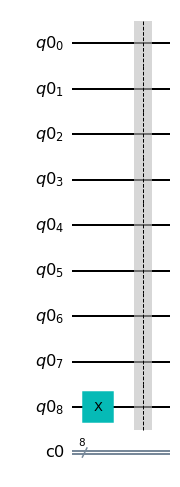

In [4]:
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

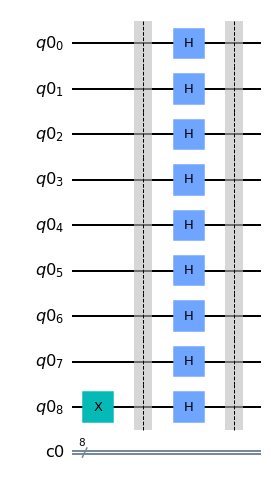

In [5]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

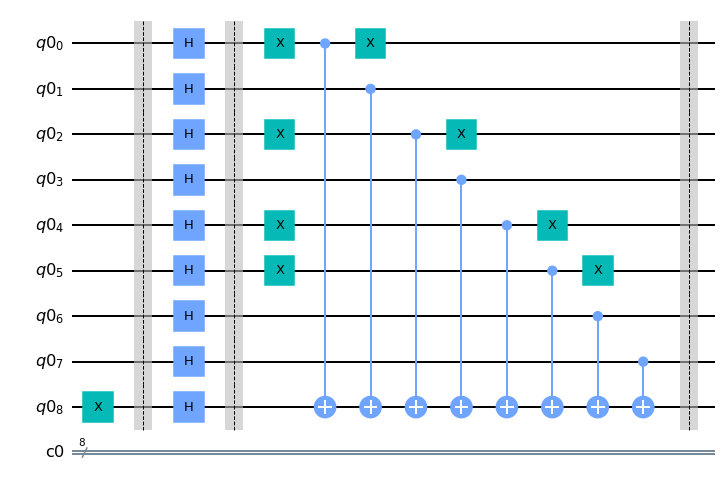

In [6]:
function = 'Balanced'
if function == 'Balanced':
    for i in range(n):
        if bitstring[i]=='1':
            qc.x(q[i])
        qc.cx(q[i],q[n])
        if bitstring[i]=='1':
            qc.x(q[i])
elif function=='Constant':
    qc.i(q[n])
qc.barrier()
qc.draw('mpl')

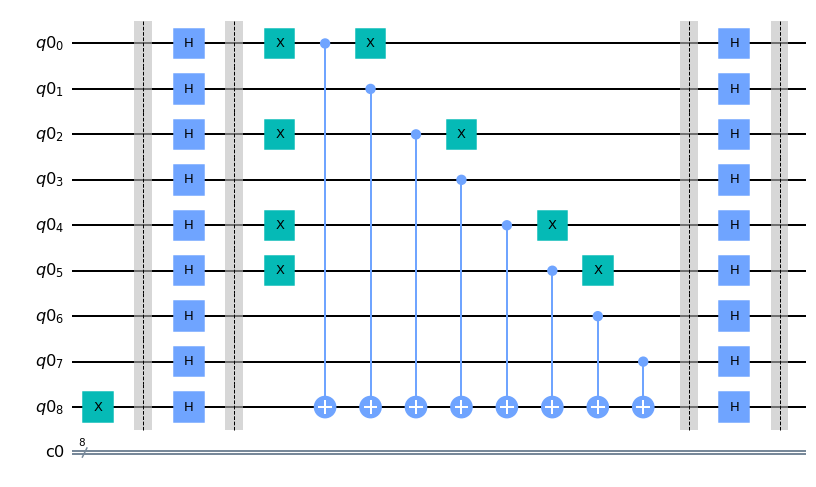

In [7]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

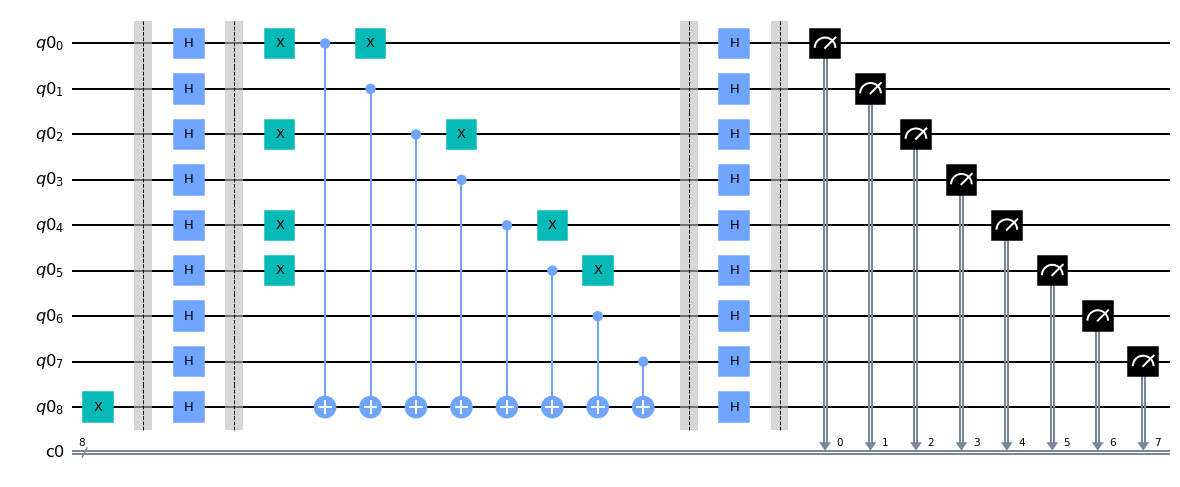

In [8]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'11111111': 1024}


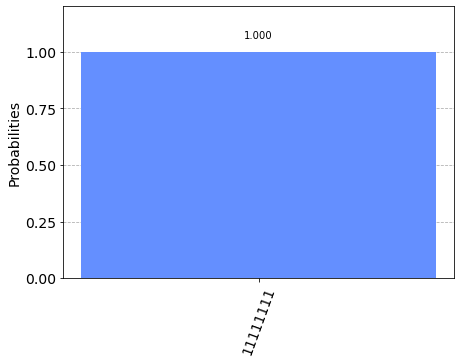

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [10]:
from qiskit.test.mock import FakeGuadalupe
device_simulation= FakeGuadalupe()

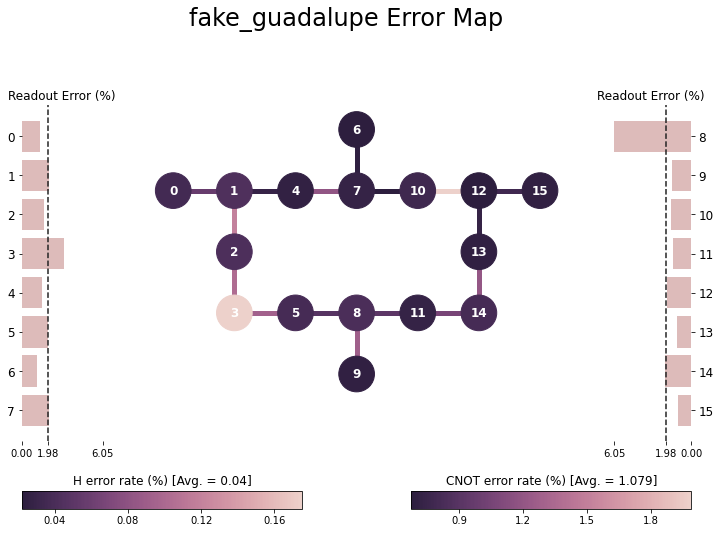

In [11]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

In [12]:
qc2 = transpile(qc, device_simulation)

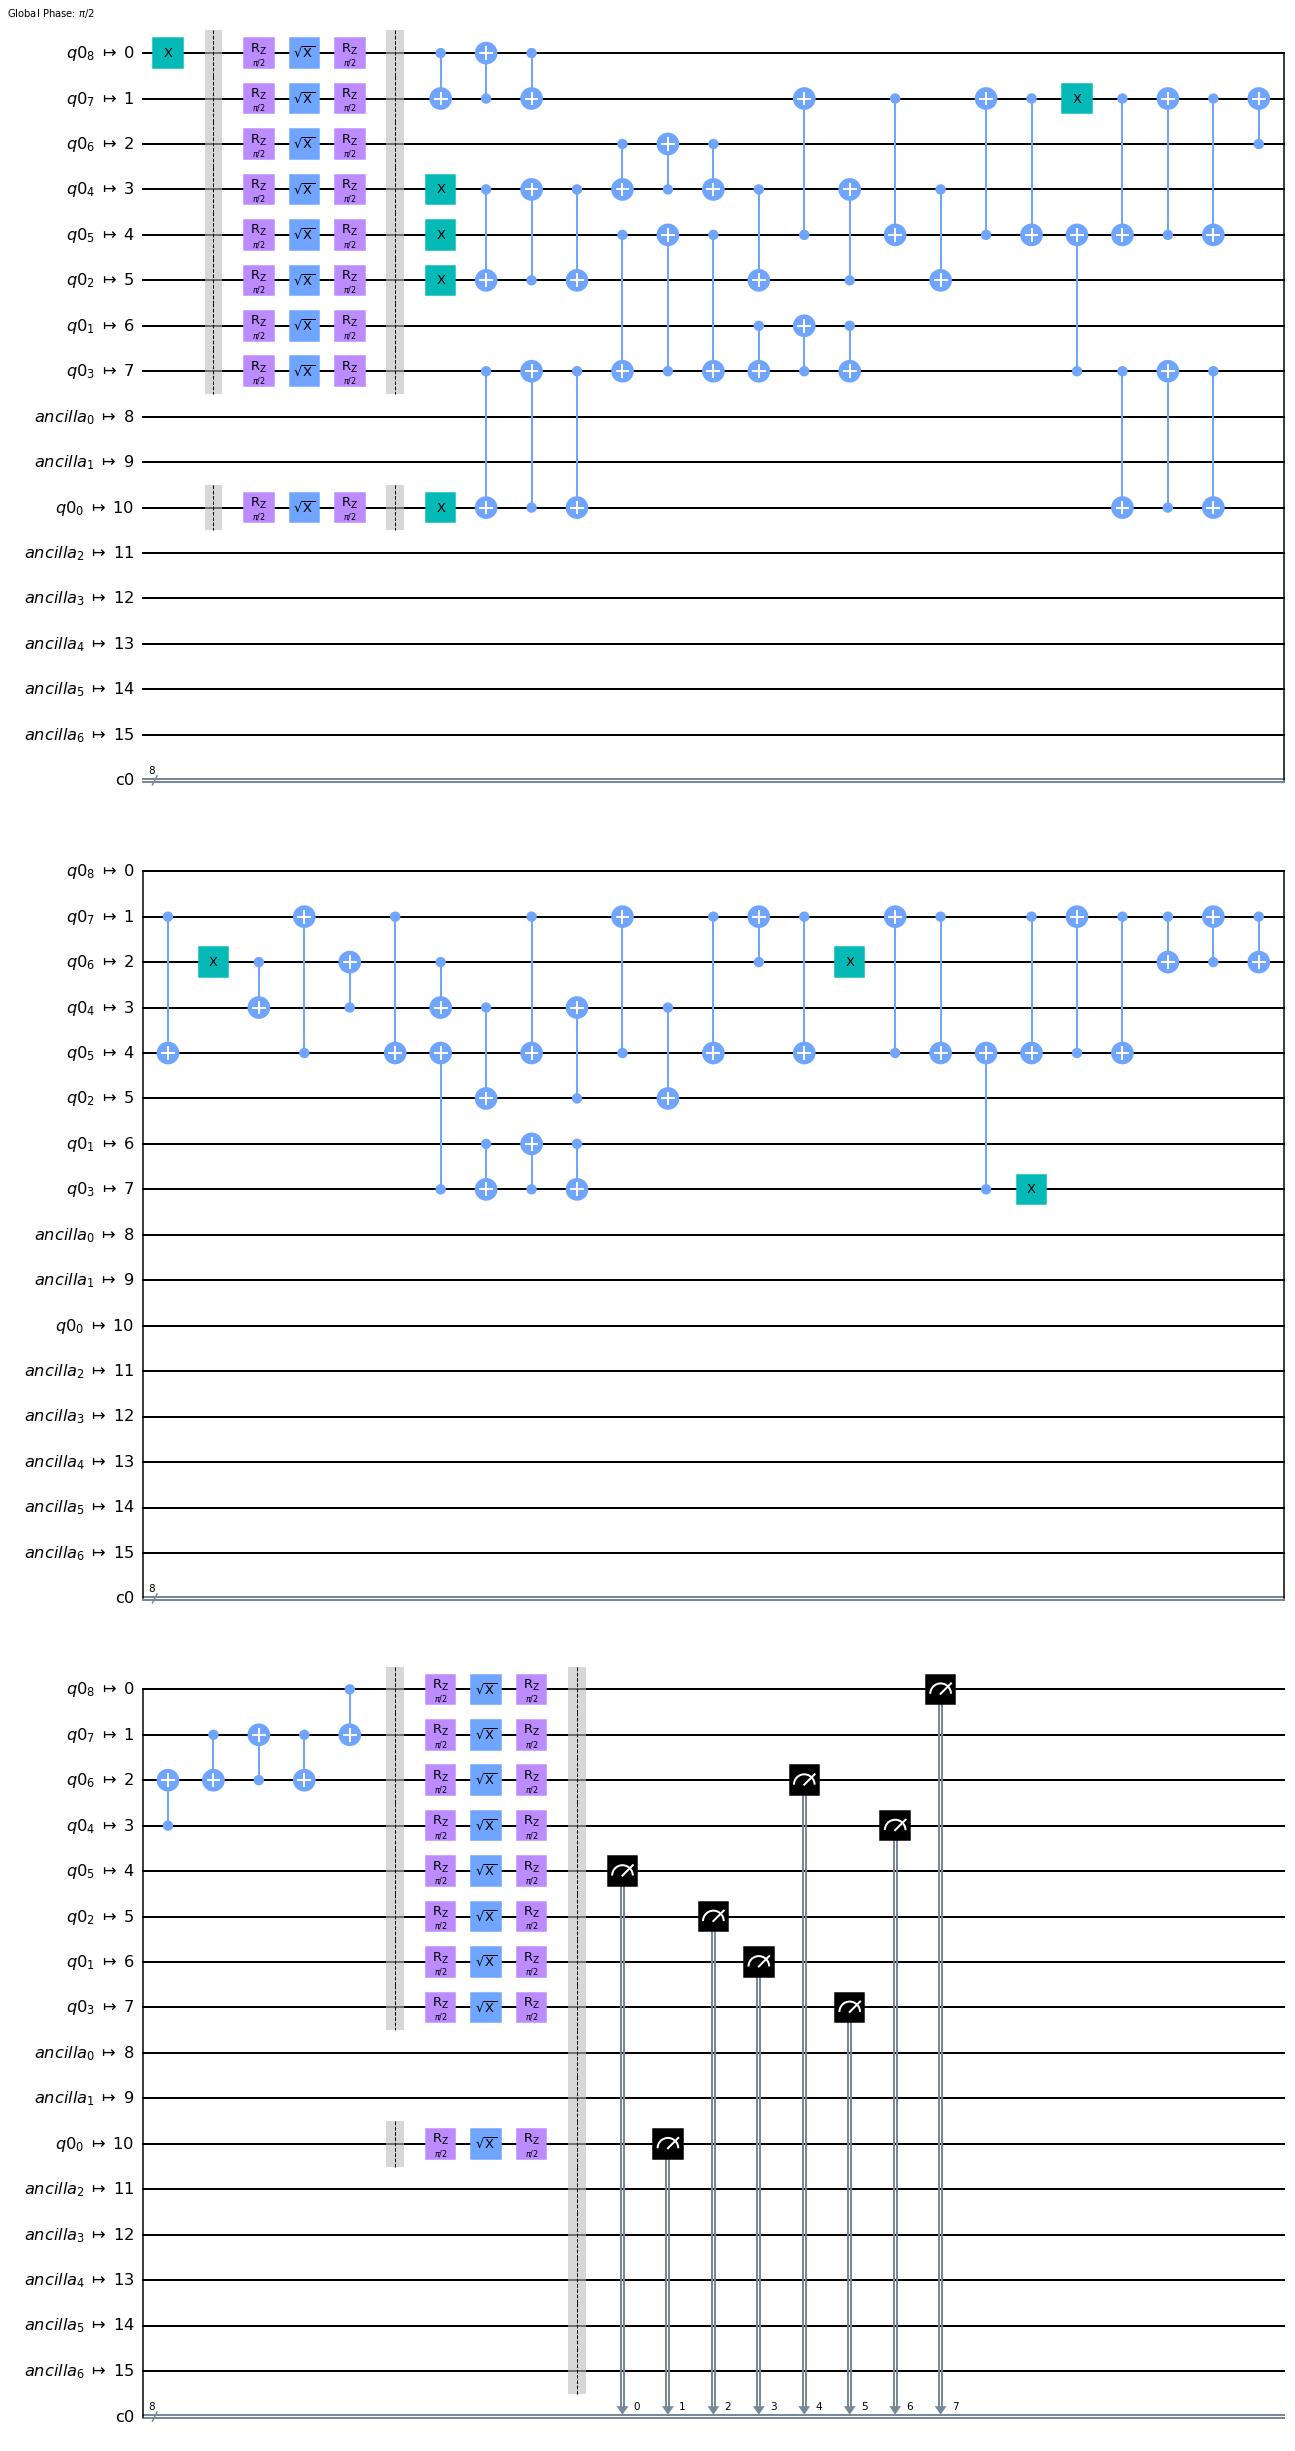

In [13]:
qc2.draw('mpl')

{'00100011': 2, '01010000': 1, '10011010': 1, '01000101': 1, '01010011': 1, '01110001': 2, '01111100': 2, '11101100': 2, '00010010': 2, '00001001': 1, '00110100': 1, '00010100': 2, '10010010': 1, '11101001': 3, '10001001': 2, '00101101': 3, '00000101': 2, '00110110': 1, '11000101': 2, '01110011': 1, '10011001': 1, '11000111': 4, '00001111': 59, '11110001': 4, '11001110': 13, '10101110': 4, '00011011': 8, '00110111': 4, '11110101': 27, '11010011': 3, '11011011': 19, '10001101': 1, '01111011': 16, '11100001': 1, '10001011': 3, '10111110': 20, '00101111': 52, '10011011': 6, '01010010': 2, '00010111': 9, '11011110': 52, '10101111': 62, '01101000': 1, '01110111': 4, '10000000': 21, '11100011': 5, '01101110': 4, '11000000': 4, '11101111': 258, '11100110': 4, '10011110': 7, '10100011': 1, '00000011': 45, '10111111': 224, '00000001': 29, '11001101': 2, '11101110': 24, '11001011': 2, '00011101': 4, '11011101': 22, '10000101': 1, '11101010': 7, '00001010': 4, '11111001': 15, '01000110': 4, '0000

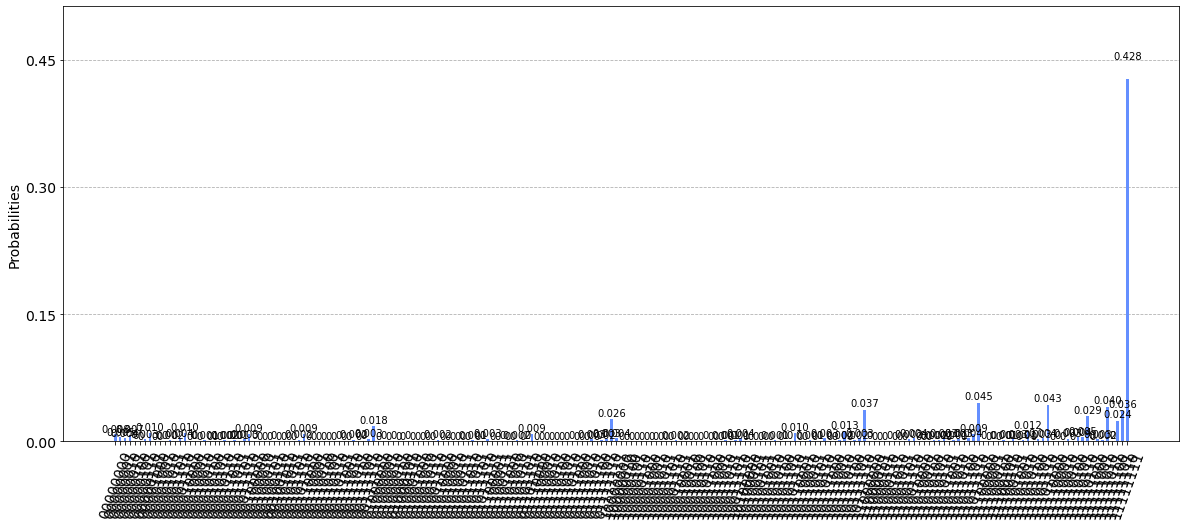

In [18]:
job = device_simulation.run(qc2,shots = 6000)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8))